# Diamond Price Prediction

The aim of this analysis is to predict the price of diamonds based on their characteristics. The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 53940 observations and 10 variables. The variables are as follows:


|Column Name|Description|
|-----------|-----------|
|carat|Weight of the diamond|
|cut|Quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|Diamond colour, from J (worst) to D (best)|
|clarity|How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|Length in mm|
|y|Width in mm|
|z|Depth in mm|
|depth|Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table|Width of top of diamond relative to widest point (43--95)|
|price|Price in US dollars (326--18,823)|


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [3]:
df.shape

(50000, 10)

In [4]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
#checking descriptive statistics
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# identifying pressence of duplicates
df.duplicated().sum()

126

In [8]:
df = df.drop_duplicates()

In [9]:
#values count of categorical variables
cat_columns = df.select_dtypes(include=['object']).columns
for column  in cat_columns:
    print("-------------------------------------")
    print(f'{column} value counts')
    print(df[column].value_counts())
    print("-------------------------------------")
    

-------------------------------------
cut value counts
Ideal        19881
Premium      12769
Very Good    11194
Good          4547
Fair          1483
Name: cut, dtype: int64
-------------------------------------
-------------------------------------
color value counts
G    10424
E     9067
F     8844
H     7683
D     6209
I     5045
J     2602
Name: color, dtype: int64
-------------------------------------
-------------------------------------
clarity value counts
SI1     12086
VS2     11378
SI2      8483
VS1      7564
VVS2     4687
VVS1     3363
IF       1626
I1        687
Name: clarity, dtype: int64
-------------------------------------


In [10]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]


In [11]:
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336
6,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337
8,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337
9,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338


### Identifying and Removing Outliers

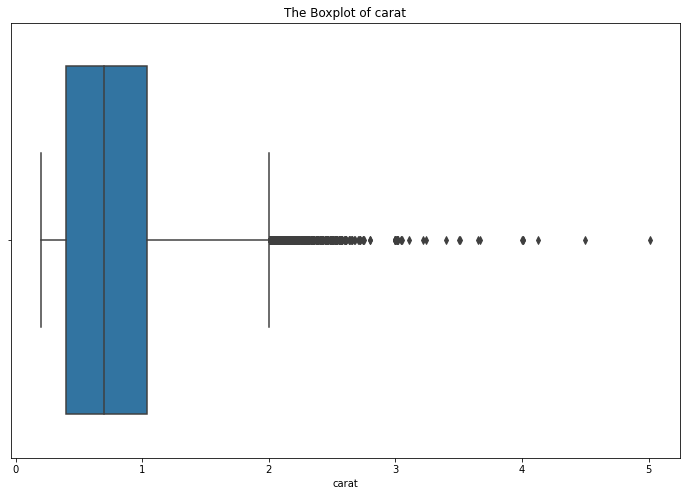

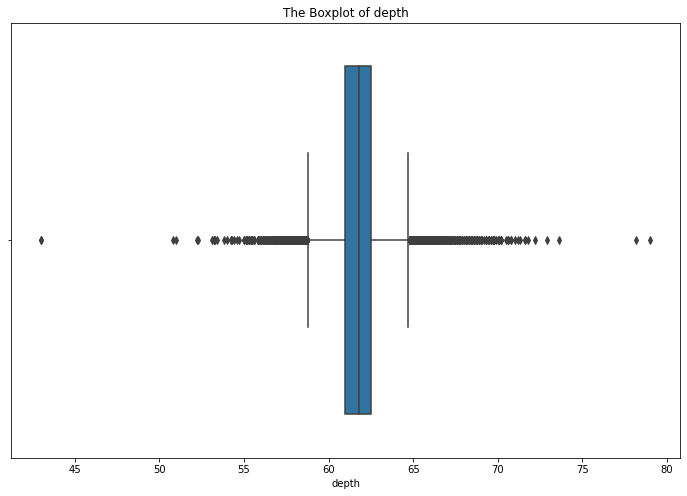

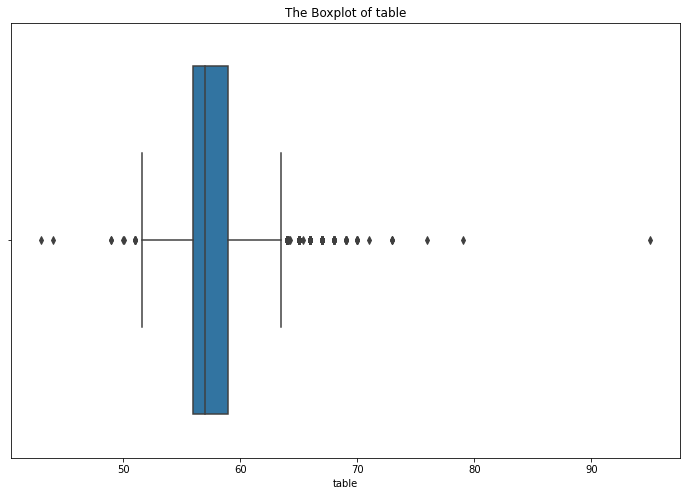

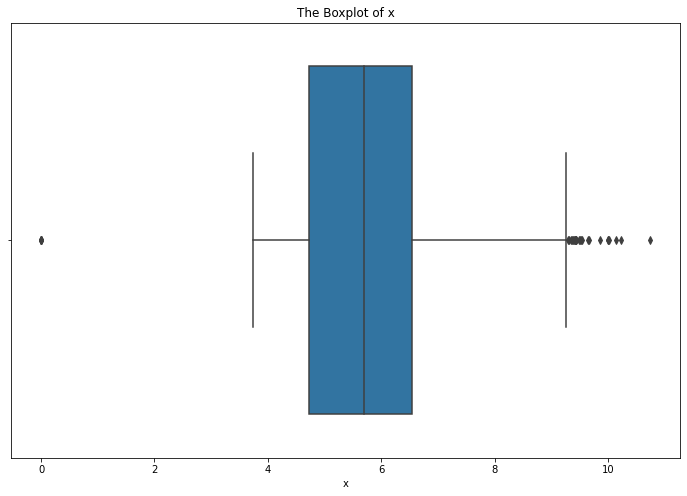

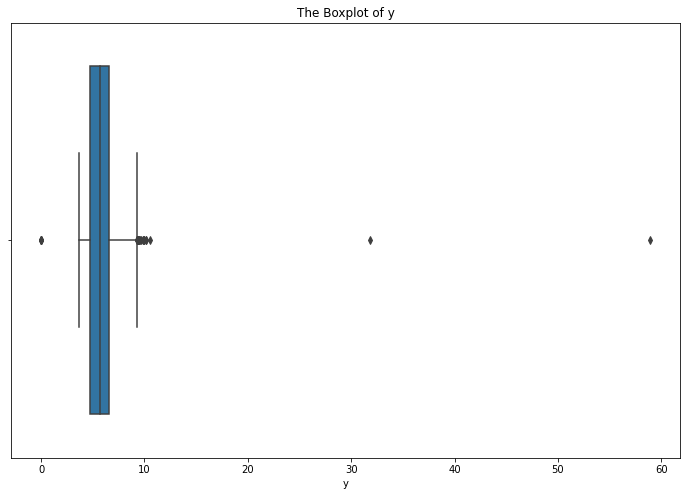

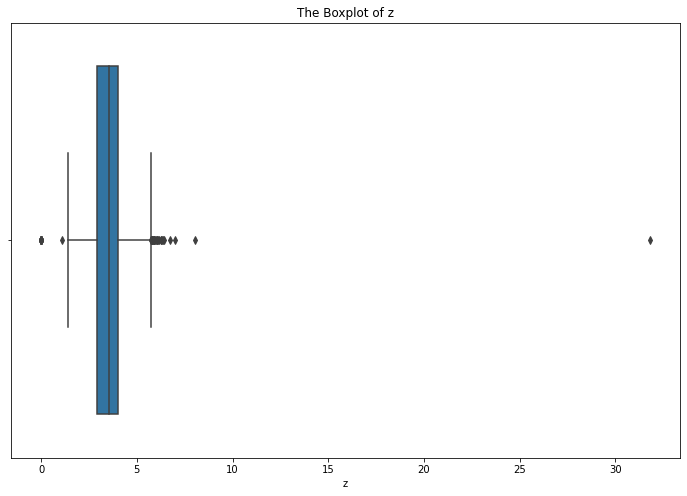

In [12]:
float_columns = df.select_dtypes(include = "float").columns

for column in float_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x = column , data = df)
    plt.title(f"The Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [13]:
# function to remove the outliers and create a dataframe 
def remove_outliers(df, multiplier=1.5):
    # Filter columns with float data types
    float_columns = df.select_dtypes(include=['float']).columns

    # Create a copy of the DataFrame
    df1 = df.copy()

    # Iterate through float columns and remove outliers
    for column in float_columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - multiplier * IQR
        upper_fence = Q3 + multiplier * IQR

        # Remove outliers
        df1 = df1[(df1[column] >= lower_fence) & (df1[column] <= upper_fence)]

    return df1

df1 = remove_outliers(df)

In [14]:
df1.shape

(45207, 10)

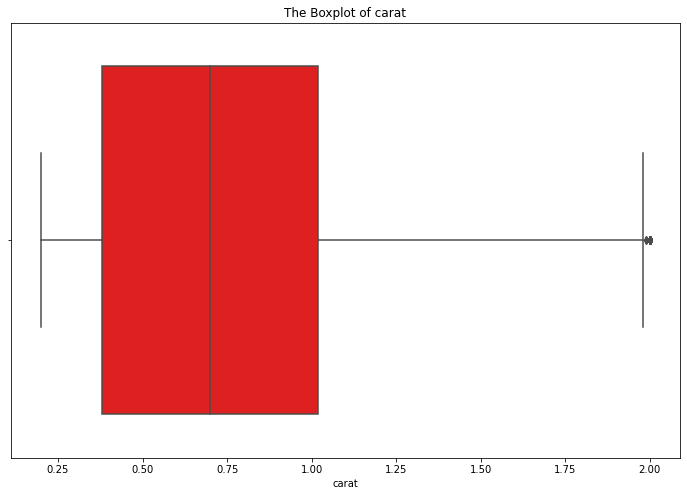

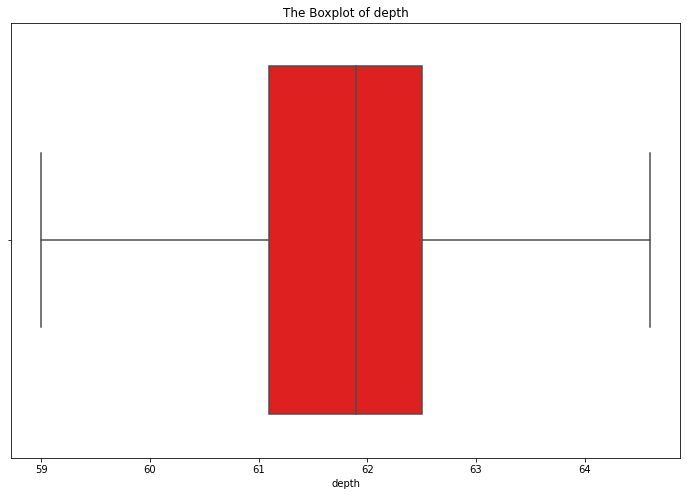

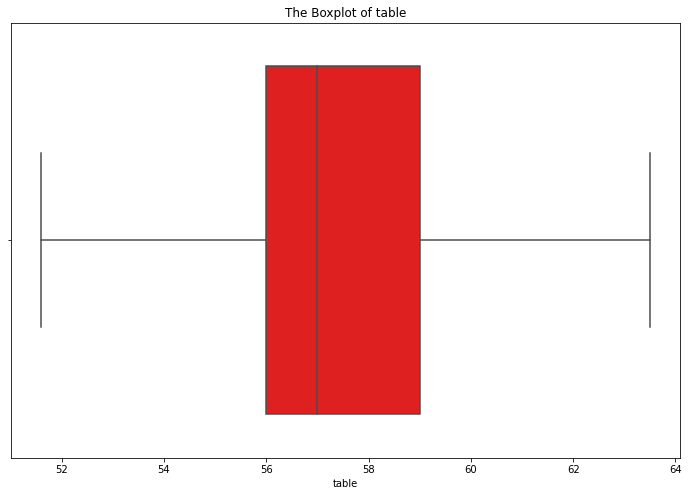

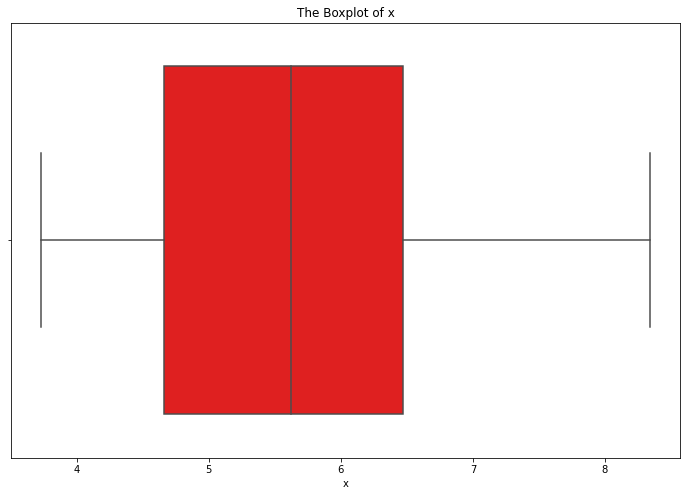

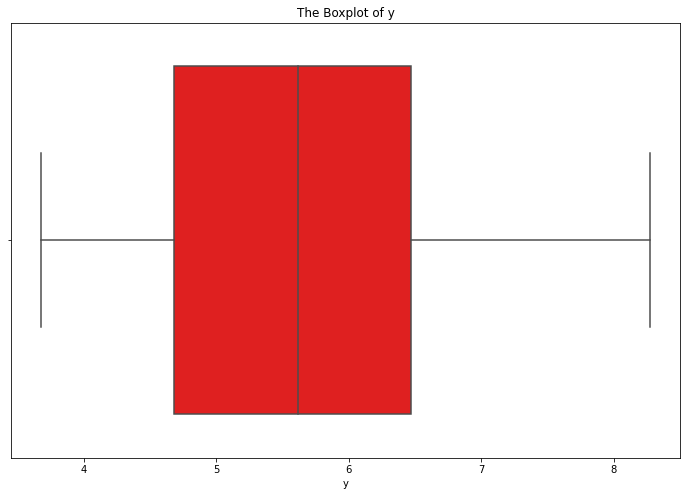

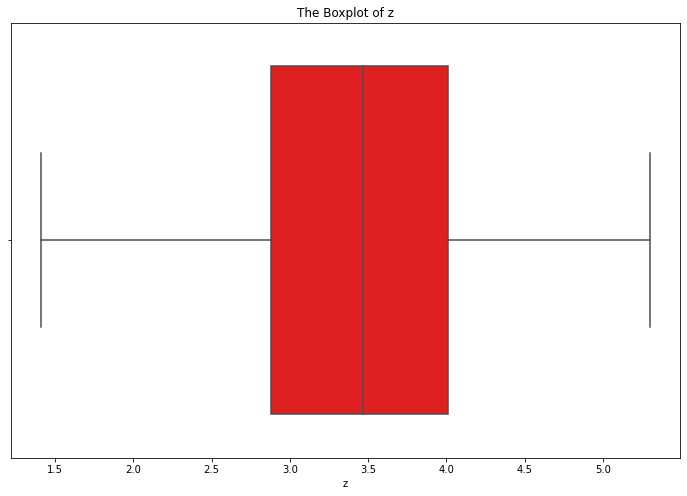

In [15]:
# boxplot after outlier removal
float_columns = df1.select_dtypes(include = "float").columns

for column in float_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x = column , data = df1, color = "r")
    plt.title(f"The Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

## Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

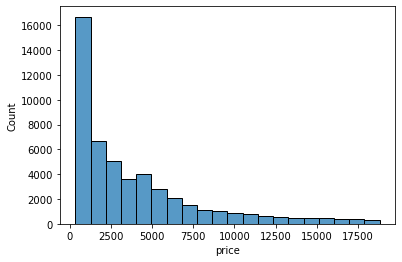

In [16]:
sns.histplot(df['price'],bins = 20)

<AxesSubplot:xlabel='carat', ylabel='Count'>

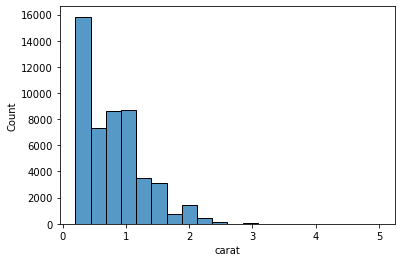

In [17]:
sns.histplot(df['carat'],bins=20)

Most of the diamonds are less then 1 carat in weight.

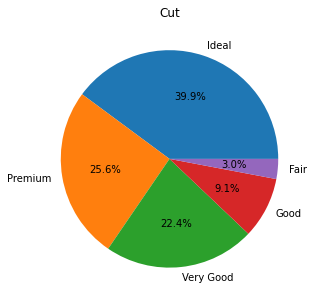

In [18]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

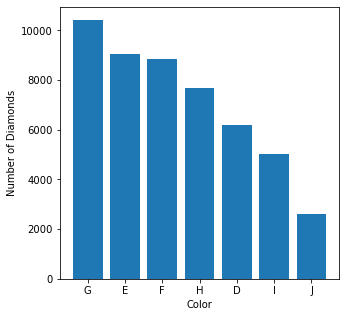

In [19]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

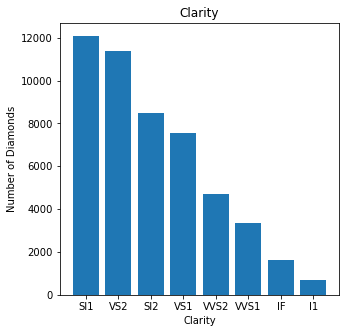

In [20]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

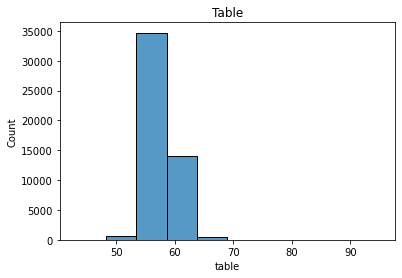

In [21]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

### Comparing Diamond's features with Price

<AxesSubplot:xlabel='cut', ylabel='price'>

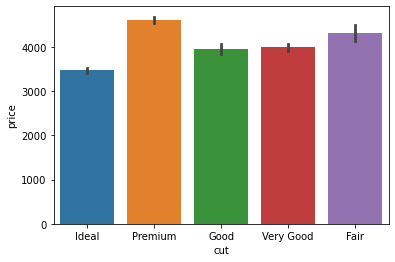

In [22]:
sns.barplot(x='cut',y='price',data=df)

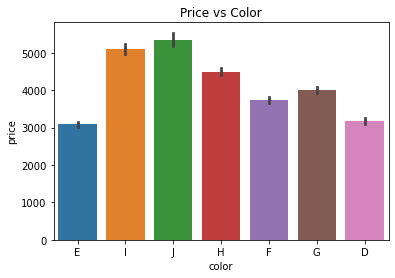

In [23]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

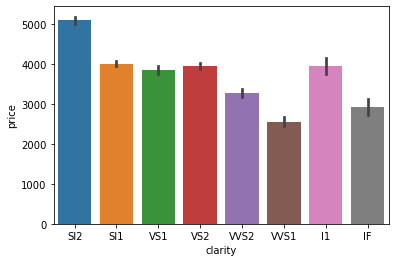

In [24]:
sns.barplot(x = 'clarity', y = 'price', data = df)

J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.

## Data Preprocessing 2

In [25]:
#changing categorical variables to numerical variables
df1['cut'] = df1['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df1['color'] = df1['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df1['clarity'] = df1['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

## Coorelation

In [26]:
#coorelation matrix
df1.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.115242,-0.233252,-0.311634,0.032866,0.181783,0.985126,0.984490,0.984061,0.909509
cut,-0.115242,1.000000,0.011606,0.163414,-0.283944,-0.405862,-0.098541,-0.102343,-0.127693,-0.049501
color,-0.233252,0.011606,1.000000,-0.055342,-0.043584,-0.019767,-0.217437,-0.217491,-0.220582,-0.097675
clarity,-0.311634,0.163414,-0.055342,1.000000,-0.071576,-0.153276,-0.332623,-0.327691,-0.335532,-0.080822
depth,0.032866,-0.283944,-0.043584,-0.071576,1.000000,-0.228516,-0.009775,-0.011487,0.087137,-0.001063
table,0.181783,-0.405862,-0.019767,-0.153276,-0.228516,1.000000,0.182893,0.177740,0.158456,0.123017
x,0.985126,-0.098541,-0.217437,-0.332623,-0.009775,0.182893,1.000000,0.998696,0.994036,0.875382
y,0.984490,-0.102343,-0.217491,-0.327691,-0.011487,0.177740,0.998696,1.000000,0.993895,0.876698
z,0.984061,-0.127693,-0.220582,-0.335532,0.087137,0.158456,0.994036,0.993895,1.000000,0.872048
price,0.909509,-0.049501,-0.097675,-0.080822,-0.001063,0.123017,0.875382,0.876698,0.872048,1.000000


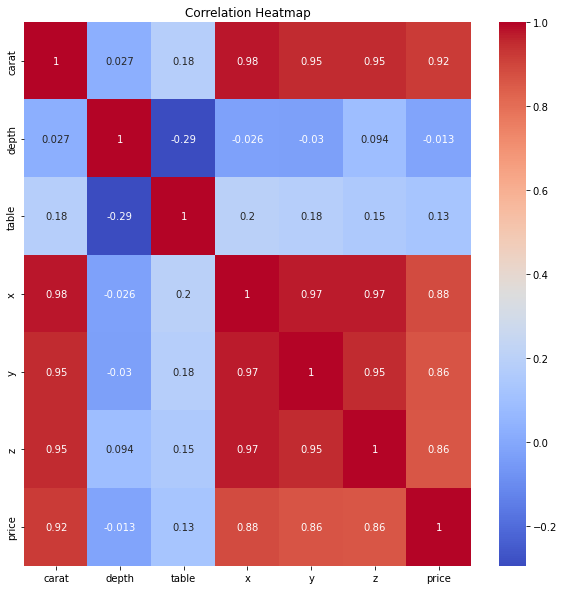

In [27]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:>

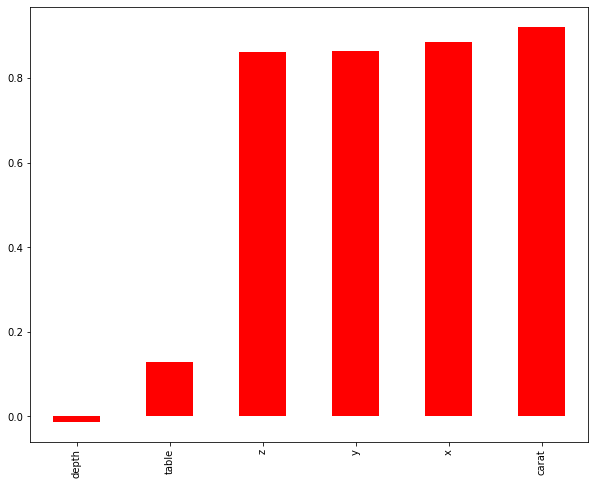

In [28]:
plt.figure(figsize=(10,8))
df.corr()['price'][:-1].sort_values().plot(kind='bar', color = "red")

#### Ploting the relationship between Price and Carat

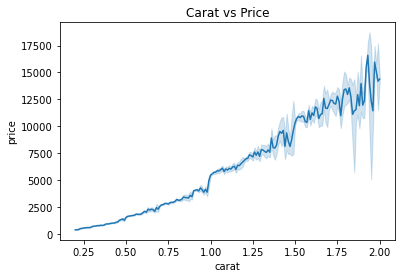

In [29]:
sns.lineplot(x='carat',y='price',data=df1)
plt.title('Carat vs Price')
plt.show()

From the lineplot it is quite clear that the price of the diamond increases with the increase in the carat of the diamond. However, diamonds with less carat also have high price. This is because of the other factors that affect the price of the diamond.

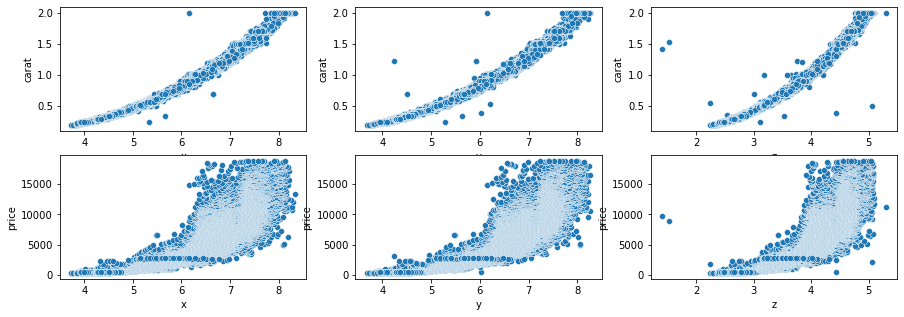

In [30]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df1, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df1, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df1, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df1, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df1, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df1, ax=ax[1,2])
plt.show()

Majority of the diamonds have x values between 4 and 8, y values between 4 and 10 and z values between 2 and 6. Diamonds with other dimensions are very rare.

## Train Test Split

In [31]:
x = df1.drop("price", axis = 1)
y = df1["price"]

In [32]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

### Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999997780364909

In [34]:
#predicting the test set
dt_pred = dt.predict(x_test)

### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9968766120989914

In [36]:
#predicting the test set
rf_pred = rf.predict(x_test)

## Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Decision Tree Regressor

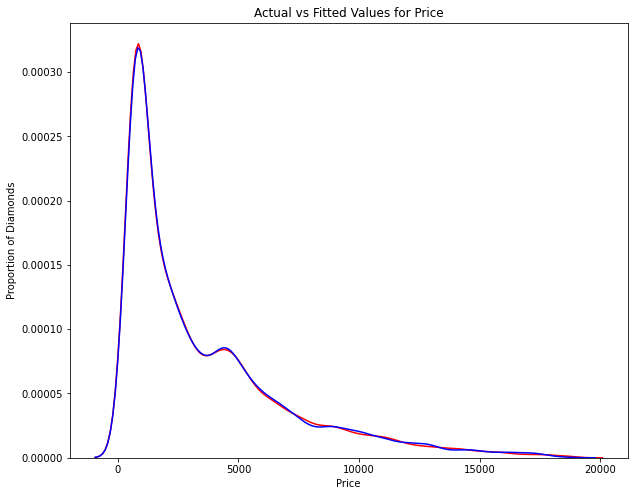

In [38]:
#distribution plot for actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [39]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 696.0819147539747
Decision Tree Regressor Accuracy: 0.9591374628320878
Decision Tree Regressor MAE: 357.88986589243746


### Random Forest Regressor

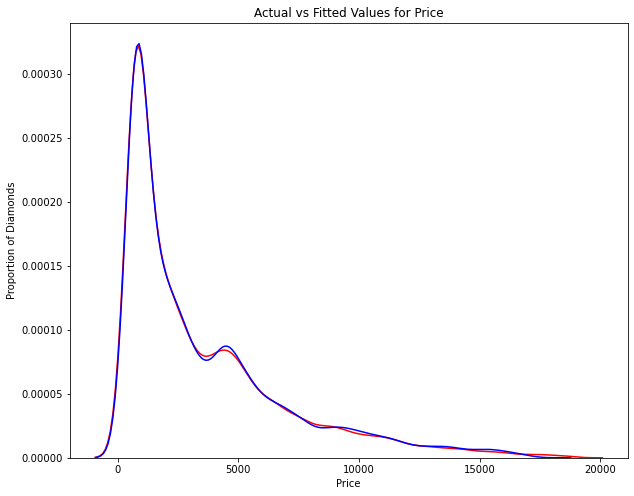

In [40]:
#distribution plot for actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [41]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 499.328577221187
Random Forest Regressor Accuracy: 0.9789729923822257
Random Forest Regressor MAE: 258.46972576616434


## Conclusion

Both the models have almost same accuracy. However, the Random Forest Regressor model is slightly better than the Decision Tree Regressor model.

There is something interesting about the data. The price of the diamonds with J color and I1 clarity is higher than the price of the diamonds with D color and IF clarity which couldn't be explained by the models. This could be because of the other factors that affect the price of the diamond.



### Model Deployment and Testing

In [42]:
import pickle

# saving the model in a pickle file
model = pickle.dump(rf, open("model.pkl","wb"))

# loading the model int the console
model = pickle.load(open('model.pkl','rb'))

In [43]:
df1.sample(8)

,carat,cut,color,clarity,depth,table,x,y,z,price
16116,1.50,3,1,3,62.7,58.0,7.22,7.26,4.54,6987
14595,1.06,4,4,4,60.1,58.0,6.67,6.64,4.00,6325
30020,0.40,5,5,4,62.6,56.0,4.71,4.72,2.95,790
29806,0.31,5,4,8,62.8,56.0,4.34,4.39,2.74,786
41643,0.59,5,6,3,61.7,56.0,5.35,5.45,3.33,1633
12521,1.01,5,3,5,59.8,59.0,6.52,6.56,3.91,5550
9518,1.07,5,5,2,62.0,57.0,6.60,6.49,4.06,4764
26656,0.31,4,6,4,60.0,59.0,4.35,4.39,2.62,680


In [44]:
print(model.predict([[1.11, 5, 4, 8, 61.9, 55.0, 6.64, 6.68, 4.12]]))

[9860.74]


In [45]:
print(model.predict([[0.38, 5, 5, 4, 62, 56, 4.63, 4.66, 2.88]]))

[856.14]


### Model Refinement

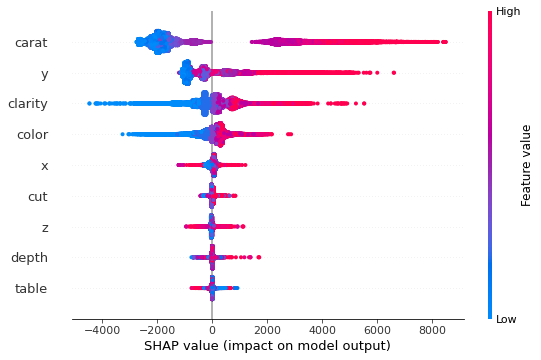

In [50]:
import shap

explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
plt.figure(figsize = (10,8))
shap.summary_plot(shap_values, x_test)

100%|===================| 36149/36165 [00:40<00:00]        

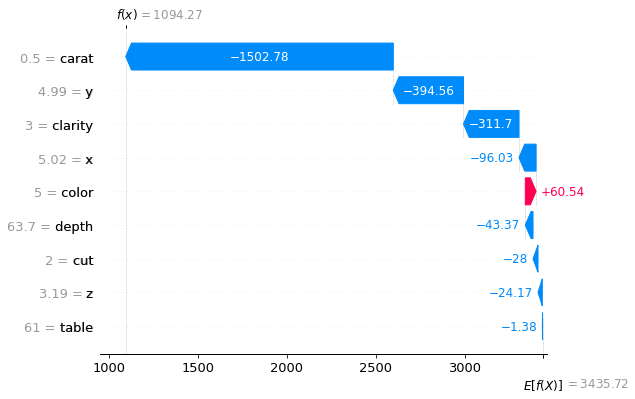

In [51]:
explainer = shap.Explainer(dt, x_test, check_additivity = False)
shap_values = explainer(x_test, check_additivity = False)
plt.figure(figsize = (10,8))
shap.plots.waterfall(shap_values[0])